In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [7]:
import seaborn as sns

In [8]:
plt.style.use("ggplot")

In [9]:
rcParams['figure.figsize'] = (12, 6)

In [10]:
df = pd.read_excel('carros_usados.xls')

In [11]:
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


In [12]:
df.tail()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
7490,TRAIN,4625,37,NO,67131,FAMILY.MEDIUM,Domestic,5,FIVE,RED,BUICK,TX,BUICK.SKYLARK
7491,TEST,4024,37,NO,77425,LUXURY,Domestic,9,SEVEN+,GOLD,OTHER,TX,LINCOLN.TOWN CAR
7492,TRAIN,4910,33,NO,61011,LUXURY,Import,5,FIVE,BLUE,NISSAN,TX,NISSAN.ALTIMA
7493,TEST,4669,3,NO,81518,LUXURY,Import,6,SIX,WHITE,NISSAN,VA,NISSAN.ALTIMA
7494,VALIDATE,6078,69,NO,76281,FAMILY.MEDIUM,Domestic,6,SIX,BLUE,FORD,NV,FORD.TAURUS


In [13]:
df.shape

(7495, 13)

In [14]:
df.describe()

,total.cost,lot.sale.days,mileage,vehicle.age
count,7495.000000,7495.000000,7495.000000,7495.000000
mean,4980.035490,76.454303,77234.533422,5.567312
std,937.602064,64.644337,17142.552588,1.756219
min,1375.000000,0.000000,1036.000000,1.000000
25%,4354.000000,14.000000,67946.000000,4.000000
50%,4919.000000,73.000000,78534.000000,5.000000
75%,5540.000000,120.000000,89340.000000,7.000000
max,9813.000000,300.000000,119250.000000,12.000000


In [15]:
df.isnull().sum()

data.set             0
total.cost           0
lot.sale.days        0
overage              0
mileage              0
vehicle.type         0
domestic.import      0
vehicle.age          0
vehicle.age.group    0
color.set            0
makex                0
state                0
make.model           0
dtype: int64

Text(0.5, 1.0, 'Distribuição da coluna total.cost')

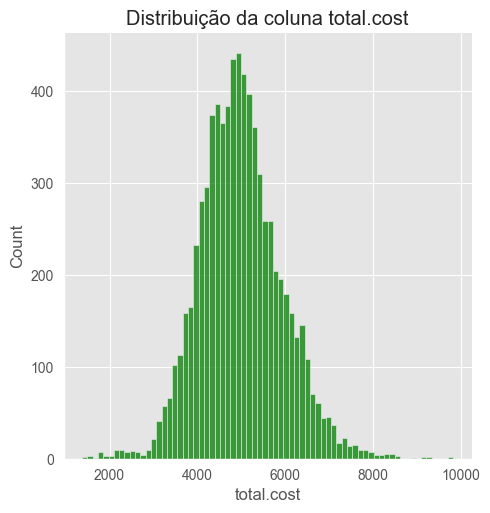

In [16]:
%matplotlib inline
sns.displot(df['total.cost'],color='green',kde=False)
plt.title('Distribuição da coluna total.cost')

Text(0.5, 1.0, 'Distriuição da coluna lot.sale.days')

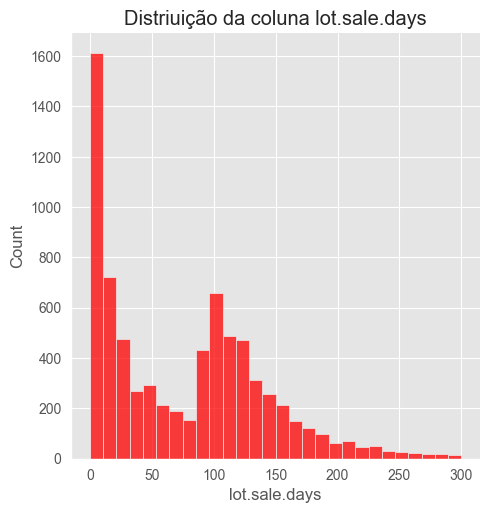

In [17]:
%matplotlib inline
sns.displot(df['lot.sale.days'],color='red',kde=False)
plt.title('Distriuição da coluna lot.sale.days')

Text(0.5, 1.0, 'Distribuição da coluna mileage')

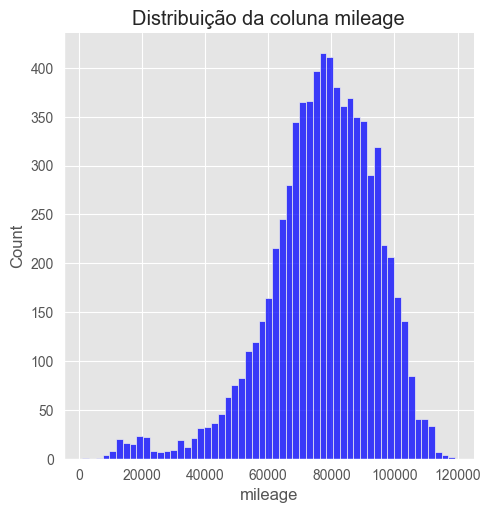

In [18]:
%matplotlib inline
sns.displot(df['mileage'],color='blue',kde=False)
plt.title('Distribuição da coluna mileage')

Text(0.5, 1.0, 'Distribuição da coluna vehicle.age')

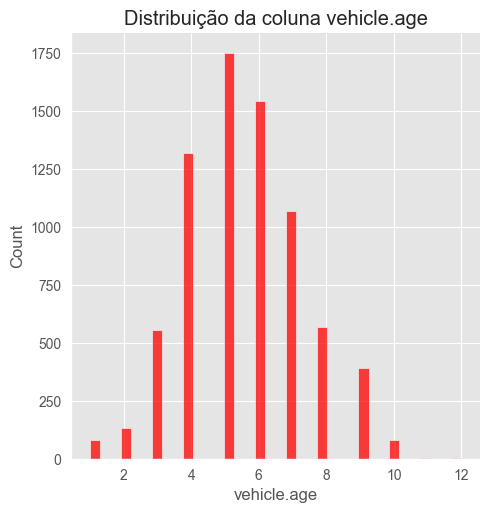

In [19]:
%matplotlib inline
sns.displot(df['vehicle.age'],color='red',kde=False)
plt.title('Distribuição da coluna vehicle.age')

In [20]:
df[['mileage','vehicle.age','lot.sale.days','total.cost']].head()

,mileage,vehicle.age,lot.sale.days,total.cost
0,67341,8,135,4037
1,72823,6,114,6886
2,96330,9,205,3924
3,58519,4,100,4636
4,99057,4,129,5080


In [21]:
df[['mileage','vehicle.age','lot.sale.days','total.cost']].corr()

,mileage,vehicle.age,lot.sale.days,total.cost
mileage,1.000000,0.462838,0.060003,-0.127258
vehicle.age,0.462838,1.000000,0.186480,-0.309716
lot.sale.days,0.060003,0.186480,1.000000,0.167632
total.cost,-0.127258,-0.309716,0.167632,1.000000


<Axes: >

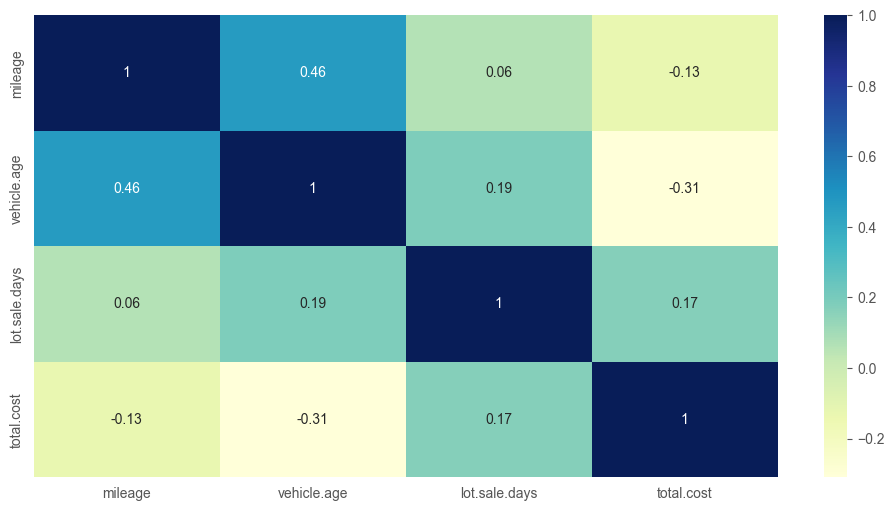

In [22]:
correlacoes = df[['mileage','vehicle.age','lot.sale.days','total.cost']].corr()

%matplotlib inline
sns.heatmap(correlacoes, annot=True, cmap="YlGnBu")

In [23]:
df['make.model'].value_counts().to_frame()

,count
make.model,
NISSAN.SENTRA,441
CHEVROLET.LUMINA,431
FORD.TAURUS,357
BUICK.LESABRE,271
PONTIAC.GRAND AM,269
...,...
CHRYSLER.FIFTH AVENUE,1
SUBARU.IMPREZA,1
SUBARU.LOYALE,1


In [24]:
df['makex'].unique()

array(['BUICK', 'DODGE', 'OLDSMOBILE', 'KIA', 'CHEVROLET', 'MITSUBISHI',
       'FORD', 'MERCURY', 'PONTIAC', 'DAEWOO', 'NISSAN', 'GEO',
       'CHRYSLER', 'MAZDA', 'PLYMOUTH', 'TOYOTA', 'HONDA', 'HYUNDAI',
       'OTHER', 'CADILLAC'], dtype=object)

In [25]:
df[df['vehicle.age'] > 11]

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
50,TRAIN,3767,233,YES,87086,FAMILY.MEDIUM,Domestic,12,SEVEN+,BLUE,OLDSMOBILE,VA,OLDSMOBILE.CIERA
209,TRAIN,2954,101,YES,115427,FAMILY.SMALL,Import,12,SEVEN+,GOLD,MAZDA,VA,MAZDA.626
2710,VALIDATE,2530,143,YES,108709,ECONOMY,Domestic,12,SEVEN+,WHITE,CHEVROLET,VA,CHEVROLET.CORSICA


<Axes: xlabel='lot.sale.days', ylabel='total.cost'>

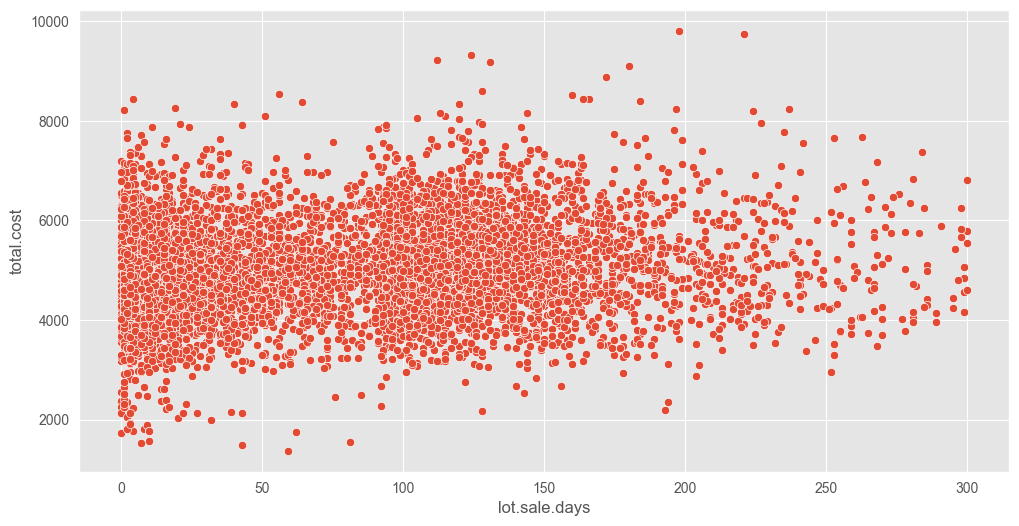

In [26]:
%matplotlib inline
sns.scatterplot(x='lot.sale.days', y="total.cost", data=df)

<Axes: xlabel='lot.sale.days', ylabel='mileage'>

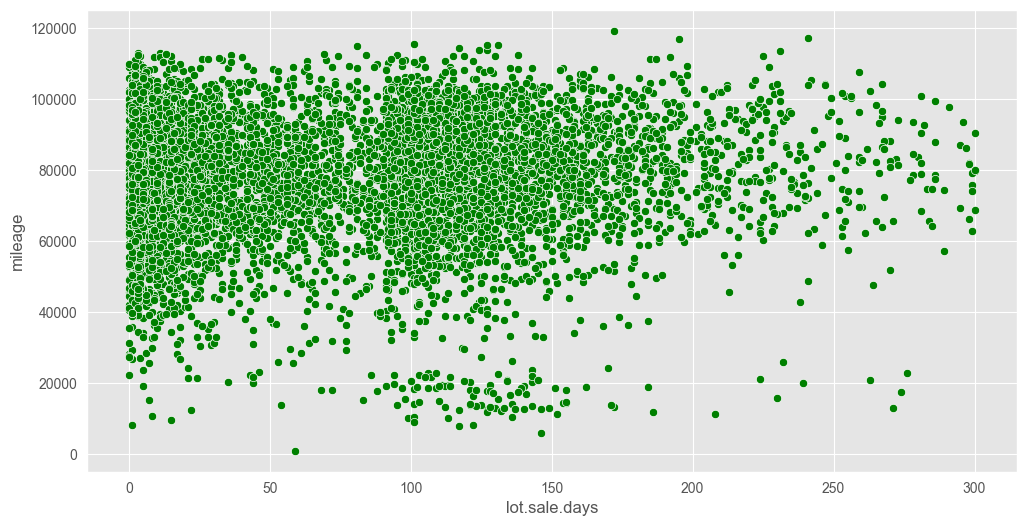

In [27]:
%matplotlib inline
sns.scatterplot(x='lot.sale.days', y="mileage", color='green', data=df)

<Axes: xlabel='domestic.import', ylabel='lot.sale.days'>

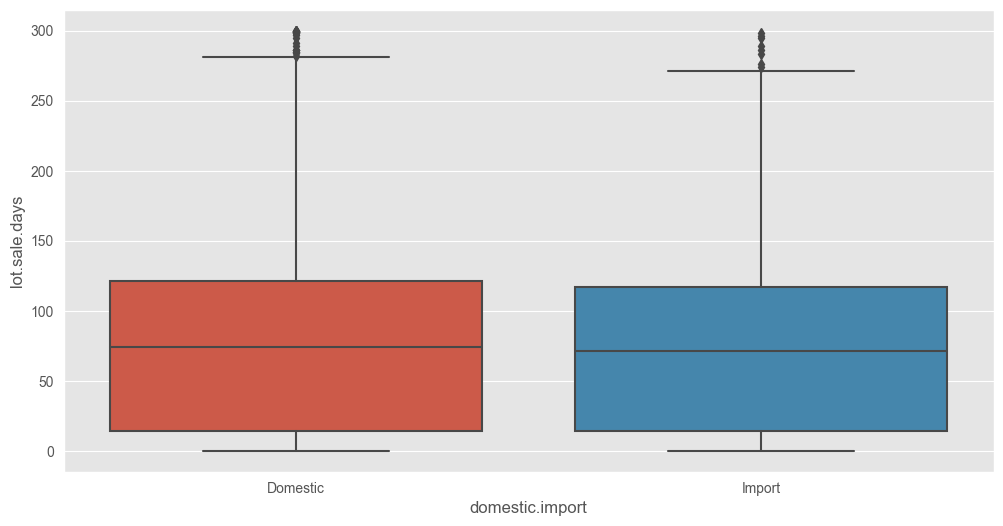

In [28]:
%matplotlib inline
sns.boxplot(x="domestic.import", y="lot.sale.days", data=df)

<Axes: xlabel='vehicle.type', ylabel='lot.sale.days'>

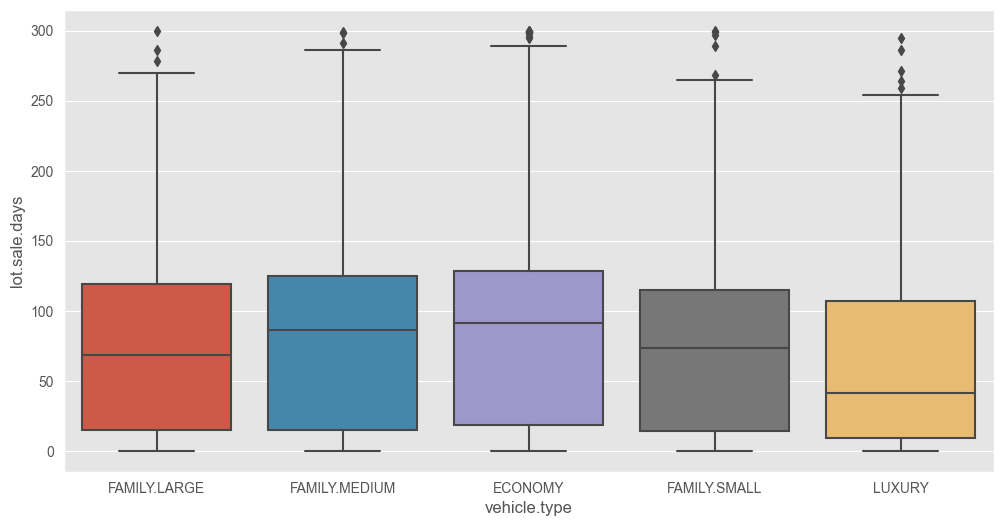

In [29]:
%matplotlib inline
sns.boxplot(x="vehicle.type", y="lot.sale.days", data=df)

<Axes: xlabel='color.set', ylabel='lot.sale.days'>

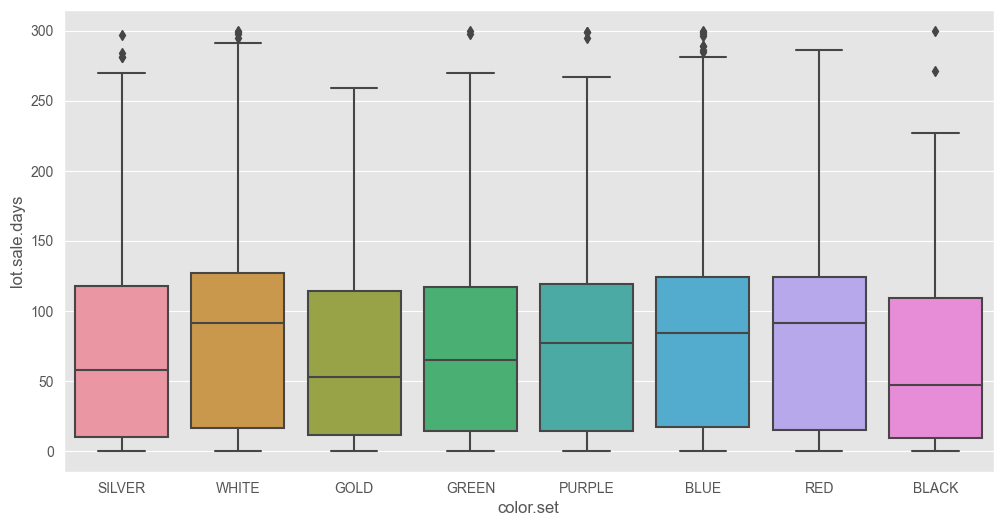

In [30]:
%matplotlib inline
sns.boxplot(x="color.set", y="lot.sale.days", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'BUICK'),
  Text(1, 0, 'DODGE'),
  Text(2, 0, 'OLDSMOBILE'),
  Text(3, 0, 'KIA'),
  Text(4, 0, 'CHEVROLET'),
  Text(5, 0, 'MITSUBISHI'),
  Text(6, 0, 'FORD'),
  Text(7, 0, 'MERCURY'),
  Text(8, 0, 'PONTIAC'),
  Text(9, 0, 'DAEWOO'),
  Text(10, 0, 'NISSAN'),
  Text(11, 0, 'GEO'),
  Text(12, 0, 'CHRYSLER'),
  Text(13, 0, 'MAZDA'),
  Text(14, 0, 'PLYMOUTH'),
  Text(15, 0, 'TOYOTA'),
  Text(16, 0, 'HONDA'),
  Text(17, 0, 'HYUNDAI'),
  Text(18, 0, 'OTHER'),
  Text(19, 0, 'CADILLAC')])

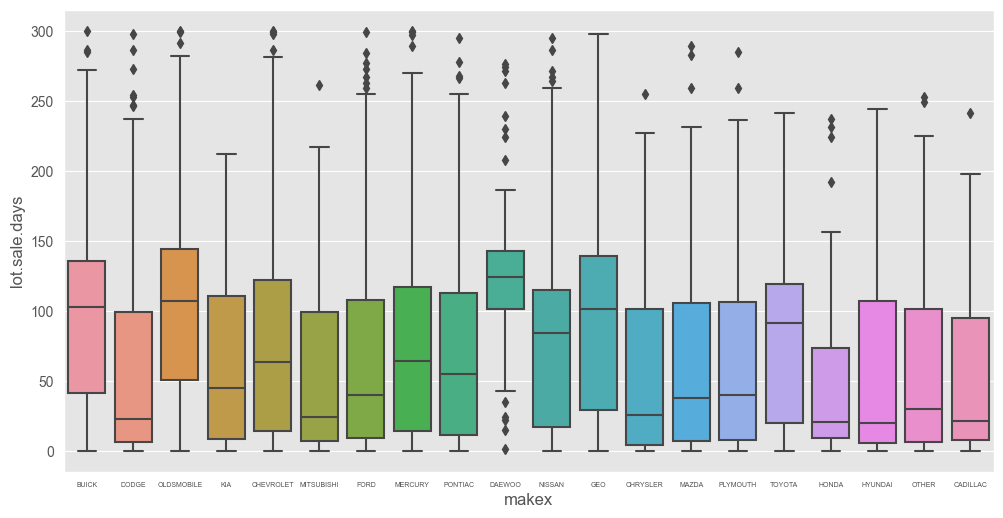

In [31]:
%matplotlib inline
sns.boxplot(x="makex", y="lot.sale.days", data=df)
plt.xticks(size=5)

<Axes: xlabel='state', ylabel='lot.sale.days'>

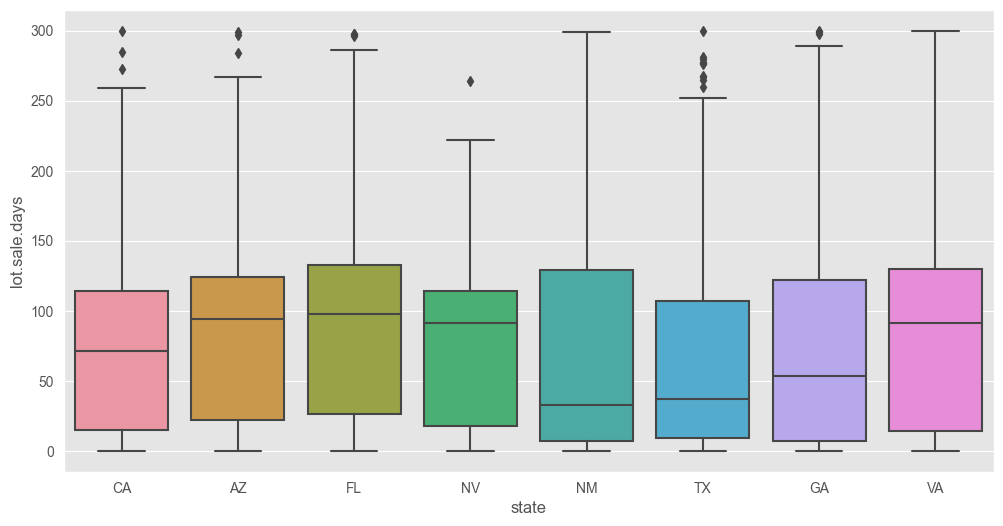

In [32]:
%matplotlib inline
sns.boxplot(x="state", y="lot.sale.days", data=df)

In [33]:
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


In [34]:
df.drop('vehicle.age.group', axis=1, inplace=True)

In [35]:
df.drop('data.set', axis=1, inplace=True)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()
label_encoder6 = LabelEncoder()

In [38]:
df['vehicle.type'] = label_encoder1.fit_transform(df['vehicle.type'])
df['domestic.import'] = label_encoder2.fit_transform(df['domestic.import'])
df['color.set'] = label_encoder3.fit_transform(df['color.set'])
df['makex'] = label_encoder4.fit_transform(df['makex'])
df['state'] = label_encoder5.fit_transform(df['state'])
df['make.model'] = label_encoder6.fit_transform(df['make.model'])

In [39]:
df.head()

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,135,YES,67341,1,0,8,6,0,1,1
1,6886,114,YES,72823,2,0,6,7,5,0,33
2,3924,205,YES,96330,2,0,9,7,15,2,77
3,4636,100,YES,58519,0,1,4,2,10,5,54
4,5080,129,YES,99057,2,0,4,3,15,5,77


In [40]:
y = df['overage']

In [41]:
y.head()

0    YES
1    YES
2    YES
3    YES
4    YES
Name: overage, dtype: object

In [42]:
X = df.drop(['lot.sale.days','overage'], axis=1)

In [43]:
X.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,67341,1,0,8,6,0,1,1
1,6886,72823,2,0,6,7,5,0,33
2,3924,96330,2,0,9,7,15,2,77
3,4636,58519,0,1,4,2,10,5,54
4,5080,99057,2,0,4,3,15,5,77


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

In [46]:
X_treino.count()

total.cost         5621
mileage            5621
vehicle.type       5621
domestic.import    5621
vehicle.age        5621
color.set          5621
makex              5621
state              5621
make.model         5621
dtype: int64

In [47]:
y_treino.count()

5621

In [48]:
X_treino.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
586,4304,56105,0,0,5,7,5,6,33
2318,4225,73592,2,0,6,3,15,2,72
2178,5546,98278,1,0,6,7,6,0,38
7054,5151,74599,2,0,6,7,15,4,77
2112,5841,99511,0,1,4,5,19,1,94


In [49]:
y_treino.head()

586     YES
2318    YES
2178    YES
7054     NO
2112    YES
Name: overage, dtype: object

In [50]:
X_teste.count()

total.cost         1874
mileage            1874
vehicle.type       1874
domestic.import    1874
vehicle.age        1874
color.set          1874
makex              1874
state              1874
make.model         1874
dtype: int64

In [51]:
y_teste.count()

1874

In [52]:
X_teste.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
7368,4846,100758,4,0,7,1,16,3,55
517,4094,96915,0,1,7,7,7,1,44
6911,4794,59583,2,0,5,5,6,6,41
6934,6081,68052,1,0,3,3,6,1,41
4326,4680,77852,4,1,9,7,19,2,92


In [53]:
from sklearn import tree

In [54]:
arvore = tree.DecisionTreeClassifier()

In [55]:
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier()

In [56]:
X_teste.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
7368,4846,100758,4,0,7,1,16,3,55
517,4094,96915,0,1,7,7,7,1,44
6911,4794,59583,2,0,5,5,6,6,41
6934,6081,68052,1,0,3,3,6,1,41
4326,4680,77852,4,1,9,7,19,2,92


In [57]:
arvore.predict(X_teste)

array(['NO', 'NO', 'NO', ..., 'YES', 'NO', 'NO'], dtype=object)

In [58]:
resultado = arvore.predict(X_teste)

In [59]:
resultado

array(['NO', 'NO', 'NO', ..., 'YES', 'NO', 'NO'], dtype=object)

In [60]:
from sklearn import metrics
print(metrics.classification_report(y_teste,resultado))

              precision    recall  f1-score   support

          NO       0.67      0.64      0.65      1010
         YES       0.60      0.64      0.62       864

    accuracy                           0.64      1874
   macro avg       0.64      0.64      0.64      1874
weighted avg       0.64      0.64      0.64      1874


In [61]:
arvore.feature_importances_

array([0.27536557, 0.22865587, 0.07944186, 0.01123303, 0.08278822,
       0.08605489, 0.04001491, 0.06367454, 0.13277112])

In [62]:
feature_imp = pd.Series(arvore.feature_importances_,index=X_treino.columns)

In [63]:
feature_imp

total.cost         0.275366
mileage            0.228656
vehicle.type       0.079442
domestic.import    0.011233
vehicle.age        0.082788
color.set          0.086055
makex              0.040015
state              0.063675
make.model         0.132771
dtype: float64

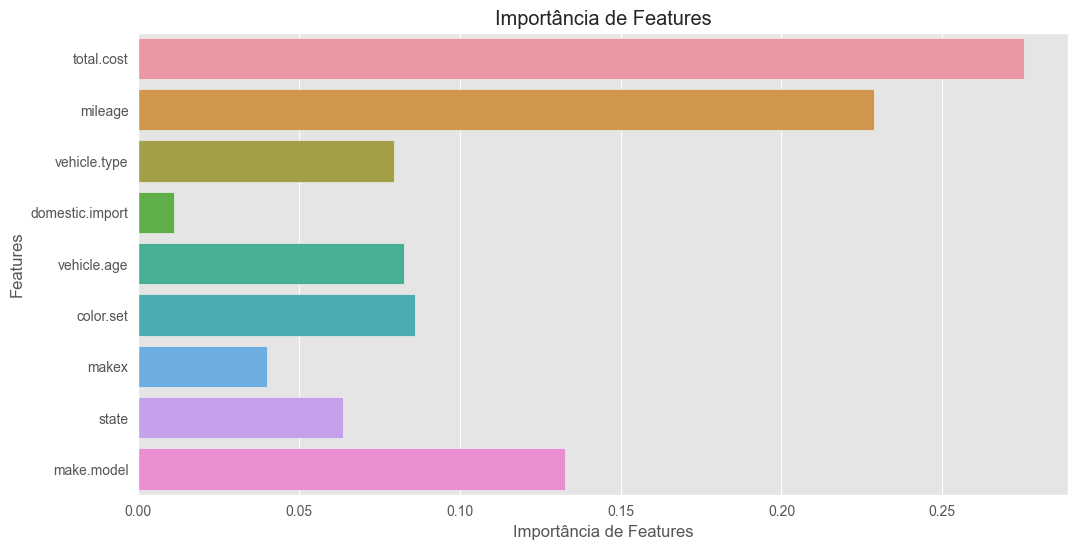

In [64]:
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Importância de Features')
plt.ylabel('Features')
plt.title("Importância de Features")
plt.show()